# VacationPy
----

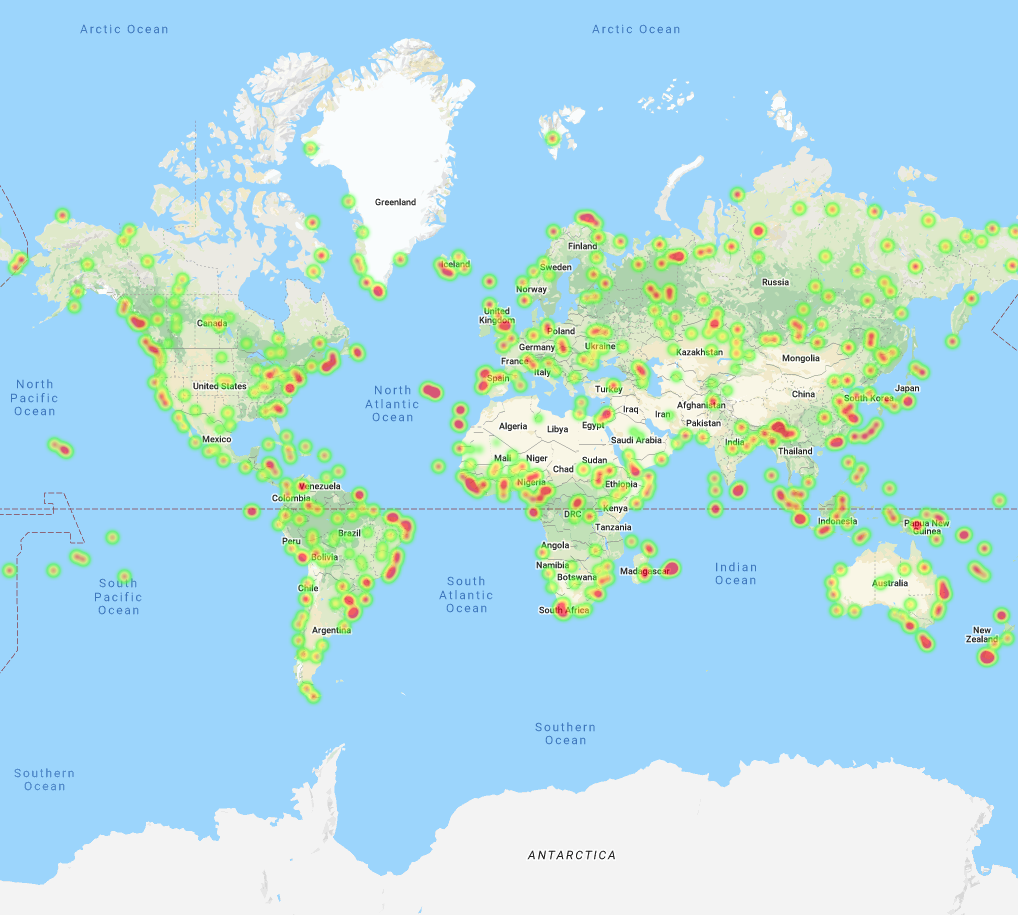

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps
import os
import json

# Import API key
from api_keys import g_key

### Store Part I results into DataFrame
* Load the csv exported in Part I to a DataFrame

In [6]:
weather_data = pd.read_csv("/Users/ryan/Desktop/bootcamp/homework/hw6_python-api/python-api-challenge/WeatherPy/weather_cities.csv")
weather_data


,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Rikitea,PF,1627334590,-23.1203,-134.9692,74.08,76,99,18.23
1,Kulhudhuffushi,MV,1627334693,6.6221,73.0700,80.82,80,100,10.56
2,Chokurdakh,RU,1627334693,70.6333,147.9167,42.31,73,95,11.99
3,Ponta do Sol,PT,1627334694,32.6667,-17.1000,76.01,82,2,5.32
4,Mar del Plata,AR,1627334444,-38.0023,-57.5575,44.62,67,40,8.01
...,...,...,...,...,...,...,...,...,...
542,Caranavi,BO,1627334907,-15.8167,-67.5500,72.12,64,88,1.83
543,Yenagoa,NG,1627334907,4.9247,6.2642,74.19,77,100,5.46
544,Aiquile,BO,1627334907,-18.2041,-65.1807,70.41,35,52,10.74
545,Kenai,US,1627334907,60.5544,-151.2583,65.03,76,1,10.36


### Humidity Heatmap
* Configure gmaps.
* Use the Lat and Lng as locations and Humidity as the weight.
* Add Heatmap layer to map.

In [10]:
# Configure gmaps
gmaps.configure(g_key)
#Define Locations and Weight
locations = weather_data[['Lat', 'Lng']]
weights = weather_data['Humidity']
maxhumidity = weather_data['Humidity'].max()
#Create figure
fig = gmaps.figure()
#Create heat layer
fig.add_layer(gmaps.heatmap_layer(locations, weights=weights, dissipating=False, max_intensity=maxhumidity,  point_radius=2.5))
fig

Figure(layout=FigureLayout(height='420px'))

### Create new DataFrame fitting weather criteria
* Narrow down the cities to fit weather conditions.
* Drop any rows will null values.

In [24]:
#create a new DataFrame that fits ideal conditions for vacation
ideal_location_df = weather_data.loc[(weather_data["Wind Speed"] < 10) & 
                                     (weather_data["Cloudiness"] == 0) & 
                                   (weather_data["Max Temp"] >= 70) & 
                                     (weather_data["Max Temp"] <= 80)]
ideal_location_df = ideal_location_df.dropna(how='any')
ideal_location_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
232,Zharkent,KZ,1627334753,44.1628,80.0000,76.48,24,0,5.66
306,Arroyo de la Encomienda,ES,1627334847,41.6096,-4.7969,74.14,54,0,4.61
388,Lake Cowichan,CA,1627334869,48.8250,-124.0546,79.32,36,0,3.80
420,Jatai,BR,1627334876,-17.8814,-51.7144,77.86,24,0,3.20
435,Akdepe,TM,1627334880,42.0551,59.3788,78.89,29,0,9.01
442,Yichang,CN,1627334882,30.7144,111.2847,76.73,88,0,3.98
461,Sulina,RO,1627334886,45.1559,29.6536,72.82,53,0,2.91
464,Al Bardīyah,LY,1627334887,31.7561,25.0865,78.53,67,0,6.04
498,Östersund,SE,1627334895,63.1792,14.6357,72.05,46,0,9.22


### Hotel Map
* Store into variable named `hotel_df`.
* Add a "Hotel Name" column to the DataFrame.
* Set parameters to search for hotels with 5000 meters.
* Hit the Google Places API for each city's coordinates.
* Store the first Hotel result into the DataFrame.
* Plot markers on top of the heatmap.

In [25]:
#change names of ideal location DataFrame and reset index
hotel_df = ideal_location_df.reset_index(drop=True)
#add column for hotel names
hotel_df["Hotel Name"] = ""
#set parameters for hotels with 5000 meters
parameters = {'radius': 5000,
             'types': 'hotels',
             'keywords': 'hotels',
             'key': g_key}

#loop through to identify hotels
for index, row in hotel_df.iterrows():
    
    # Define latitudes and longitudes
    lat = row["Lat"]
    lng = row["Lng"]
    
    # Maintain parameters with various locations
    parameters["location"] = f"{lat},{lng}"
    
    # Define url
    url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"
    
    # Capture hotel name
    hotel_name = requests.get(url, params = parameters)
    
    # Convert to json file
    hotel_name = hotel_name.json()
    print(json.dumps(hotel_name, indent=4, sort_keys=True))
    
    # Include option to skip missing data
    try:
        hotel_df.loc[index, "Hotel Name"] = hotel_name["results"][0]["name"]
    except (KeyError, IndexError):
        print("Missing result.... Skipping.")

hotel_df = hotel_df.dropna(how='any')
hotel_df



{
    "html_attributions": [],
    "next_page_token": "Aap_uEAnR4OxomZpSoMA6BOi_Unhnpi4VHA3HgTu8Eu_rh6dOi3Drd1kpcpsdTGdoOUChny8e_j08Vd8t-XFDq3lzDj69PpIpGhm2cPa5AktC1Mi7XdLkHHvEIkkpvPDupPT6IkEIzw-Wen_2SIQScLB63ASs-YnEi5UNHqmxjl98P_kBGZiZR_FkeMqwOY94PHceOAf3AelrVn4E0M4akAhekSV3u9rs3uB1KMYFs188IWdWYteY5LId-v_XfoWDucGgBjg_Y_C5k3QDKYKs77FYQVZGN6h3Z4kOkkrkVUWPNbEuwIY-TJ8gRX62eD1YdzSdC7aJxo9DAf_AI1Lud5xmyCDdMnijbmj8y3r8v56IWYDqTOk6WCxqovjqdIcbriISGL95XceF3d9htsWY36w4RD033efuEtWoRFhGKduQESNeOiwCyJ5PHI",
    "results": [
        {
            "geometry": {
                "location": {
                    "lat": 44.166512,
                    "lng": 79.999974
                },
                "viewport": {
                    "northeast": {
                        "lat": 44.22939502717811,
                        "lng": 80.0668143543241
                    },
                    "southwest": {
                        "lat": 44.1349469599964,
                        "lng": 79.97969627659286
   

{
    "html_attributions": [],
    "next_page_token": "Aap_uED4edEZR81u2fWNcEBtjfLgE3F5pjdVvuwen_vhr6M2Ba0srypucEDQGXICKv3-Hrma61QYE2i6oEZDO8njZrGhEg4TX2UYhSD7GyLj_hoASo3Ah2GJ0ULzjcGjvB4gGoBvhN6ohVSrC016dwt_8iQt54xPVJ4we85hBG6-tth4Z3MaHrxNdIAJ-10BpvRi08x3UKlYyGQEUfSn2vwfo6KspVBaF6Kh7VMRuLhnFN9NSYKB_IJIijGIwJa8pT3PpVM-dyDfJykqo7JxujjmNn5UObkPZRni67O5yRVESe1sHa2VtMc2pzQ2adWyO-L1Skb6twbYa36py9ZhXSuMIGYZJOj5lpxw-U6pfrWnlZ5nkGQe3z1HOHo5iESXsAXbsEq4BvQQ-7SaoFl4iW7uyE1uovrE0ll9BLKkkpO3SeKsJUI9NQlSQkI",
    "results": [
        {
            "geometry": {
                "location": {
                    "lat": 41.652251,
                    "lng": -4.724532099999999
                },
                "viewport": {
                    "northeast": {
                        "lat": 41.81550857174353,
                        "lng": -4.689443915306096
                    },
                    "southwest": {
                        "lat": 41.5909982535988,
                        "lng": -4.9281803

{
    "html_attributions": [],
    "next_page_token": "Aap_uEDqH9AlUEIQjAIsPpt8Qtst1LcuBgchXmw2-kXtGdqaz5UnMbdQj25Rak-yjfzPAwwi_9O15OvHsJWh3hRAsPN_S99Cld-CqO1l3abD84_i2Uel95MoalLFVyP_APQVF4tzL-AhDSEJBjpu8tA_B7S0T5jvVItVLApl7F4MDo-qIMvHOOQ1dUnpQrn9EHioZVm08a1ZMewBrKYnmGZLnr6iVC8MoOHJhaD7iBrDiT4ozq-m4_Te3Zi83NqbFeJdaRiKOhkwd6gMHG3RaUQYwFrCy2cvdRDHtv7CnkRMCY8ZvOXdNNEu0W8wjQWzPKCzRu1K_llTkkmrzT_MV11AUGQyK-oPzNMI42gEVLSI7B7ANmDb3hZvIxT6mT4mH4X4EClDCuXEO9IDAyesi9ZMKlvEThvTbnBI6lkgksAgWnu8uaODjugIiY0",
    "results": [
        {
            "geometry": {
                "location": {
                    "lat": 48.8258118,
                    "lng": -124.054167
                },
                "viewport": {
                    "northeast": {
                        "lat": 48.84187492765065,
                        "lng": -124.0032591144062
                    },
                    "southwest": {
                        "lat": 48.80718492112378,
                        "lng": -124.1131551056

{
    "html_attributions": [],
    "next_page_token": "Aap_uECIjnS0jdr1gMvcjYviozHhrjlc4JvOYPxlVvSvVn4FEdtTLWQTbpB_8LWF7RvIGJYAXszuIb3xNm_iDyiwwqgY1O4shJVM6uYRaxSW_DIUF49GsFeoHybgXU4uUdFXY0EDK-QUTz1vgdc9sj5Sw4hA78a18DjpN1i_gy_bJpoEmTHO2GGGRZWV0dnKvzIoF7n046af2c-GXXDLbG6U6O2-A1a4CkG_5Y3iMNtRRTNdSH2OAY1EKqvUl_0e3NfXvQ7leudibPvf_8daRoBi1X6oxQaDe7-85206Tz_Ude1F2XYa_pg_GEosm22kGzKSsD_nD6Nx880PCSjhma-vVERPBCY74-0GiLdQTzwbt_sbtoA7VcTAENwXBR5aEUIs5wdMXBLHMYPR12DNhQcytALxicfZqBgfoMsswffLHBNnPeI5Erua9eA",
    "results": [
        {
            "geometry": {
                "location": {
                    "lat": -17.8881027,
                    "lng": -51.7263895
                },
                "viewport": {
                    "northeast": {
                        "lat": -17.84580393714873,
                        "lng": -51.68909164560518
                    },
                    "southwest": {
                        "lat": -17.9244087425668,
                        "lng": -51.749167336

{
    "html_attributions": [],
    "next_page_token": "Aap_uEBsRG8Dt0zyzLnrKGKm2Q3UeyibwNuIF2BunzxE-Khfjqp1yADPk86HR0N3Db1e8eZbDWT4CfCLvIm1kyLajWsmxJBwI7TwPCzV4hb_hkKffe6CZx4oIfHZmiJ2vT4pR0jdYh1aeAJehHHN4Snb1Al41OHi5EuiHh2RxB2MwwpudjORkBE9z1qnrUflENScKmvOMMoFDVrC7PIWOlIZGC-9FChm1oHgOl0WbVy00Qgz14GqD2yau3pZ4mJdXxvC7taHNE-MgUvlgYAu3DCuDddmpuY525DsBEkJ7KRhkm0olvP1KPKqIueQxvLoYSjVEQu2UBX3GA6YnM7g4rSz-KxB4fu5U5Xi5SHDS4y0F10vwMVfDAPCY8YeyAT3EZk_SUow6ptqBNP69NYEdNgICHVVVUFLkDWpzmiHltSt1jJPHbrvodgL_Tc",
    "results": [
        {
            "geometry": {
                "location": {
                    "lat": 42.0531638,
                    "lng": 59.38455200000001
                },
                "viewport": {
                    "northeast": {
                        "lat": 42.06668996966342,
                        "lng": 59.4171952973714
                    },
                    "southwest": {
                        "lat": 42.03294252556765,
                        "lng": 59.35943130

{
    "html_attributions": [],
    "next_page_token": "Aap_uEDsnSV66E3tbWTxgQmakK8N2ajb0XTNp0sRUeUDIGUb9Rlse8_I0SIuCT_JukTmdrff6TiIHozXQJXFG0nP8_qz-r6cDSiaULHUhbHh98tICoqy3gwc-1q1cNm4tFPmLydPCbpyL-e2jwDNhM641nEREdtDZvDfx4pXt_jLw_Y66DFgEfJLj3CQkKpN9KTJIohmYdgWZsiWPH2ICoZK8FAdZ7Dnjjln1XX0WCvXls87t6ljK6uWOZIMax9isXqIrKOfL7VaOqwfwshtgTdvQwT0YdnyAtSy7YdpSj62Pjk4Rt7_41bVPY84e-Lo6_Vm93NOctMEEaphccZw_nAxoxH19P470lgSzymXb2iYgvYum7NMPQZfSWPmd6iEBWKZ7mZ5p6B8icp1QvW9ZZtOJlprE-WnO3hQg2_s-mHdl8sxSONfToGScRg",
    "results": [
        {
            "geometry": {
                "location": {
                    "lat": 30.691966,
                    "lng": 111.286471
                },
                "viewport": {
                    "northeast": {
                        "lat": 30.8219719,
                        "lng": 111.4377594
                    },
                    "southwest": {
                        "lat": 30.58700019999999,
                        "lng": 111.1562347
                   

{
    "html_attributions": [],
    "next_page_token": "Aap_uEDQd9edA34BUvDzGRQx3p6AjO6a9uPZ974kXzfuKVLjYJZl2I04cvNLJ3HECK0StIfpbIClgI9ljv0nJn___wABgsw8us1RiZQHuAuMYs2YALsicMeYuv7_CEtqQFXspLz2vNFmTeh0BzyuaRxT1GhmLF13TGuplzWK8VBXiqU0eNDH7B8m_SUdZOFoP-jq0qaBz9MbIN-mRIiEOuXdxYFkA10f0vtN_B7dS45mp7i1d1ZJCevFzodUYwU6OBhM9W_ZHDZmeCKZI7WI8aaI7T-YsHoFLXBBmmf06L0fWzDQJ-pkLXHyff0RtvUxnCfQfQSfRACrX00jRN-xZe4i3DtZtvSIQBFLaqUVtdIYtWGOKfeCaV1qDA3TEYGqwYxr66bO_y4g_8iWwD8wUKWOOM_G392e_1GSdxRjYy2ZgMe4f-GaV3kGkbY",
    "results": [
        {
            "geometry": {
                "location": {
                    "lat": 45.1567446,
                    "lng": 29.6595489
                },
                "viewport": {
                    "northeast": {
                        "lat": 45.16346087671702,
                        "lng": 29.69141009508375
                    },
                    "southwest": {
                        "lat": 45.14397069481641,
                        "lng": 29.60557950043428

{
    "html_attributions": [],
    "next_page_token": "Aap_uEBvNzCjx5ga37n1wrqXi334QMBxDPROyZ_SkddnSqgjIR_ES-XlCilZzhhay5my2ch5gRPFA7Oliat5OCtDZL2I7A-cHkGoN2wdVTjuFcpWnTf_E8z0D8hQzdVxl0vi-5jiDMrWzZ7srEwRkUKqYuFYUs56obwQTlOwlOhX_bB3-2rNuahrW6Fiz_xQMGp7vVs7PFC_KHCJ15r0NOWBKBIPuwOoEodU7ga3-MATH_BVeQkygaVS39pIk46G0VJ5WKGjhS7z7a9XGxtAVZpz8TqqAZGOkBPr-zQo31TfsASIbCqCvwKUhuwVB-3BI6zK489q7nXCGjwKC61oaT_t2pe8HrlzAQv9ui6uo6PRbqm9v1bnGrkbR4w3GWhTpMRT5bJeU8laSEVvBGyzwGJKRTR9gmUFI-bnq1m6_EojbCviSXHEeZmHdqw",
    "results": [
        {
            "geometry": {
                "location": {
                    "lat": 31.7579946,
                    "lng": 25.0792189
                },
                "viewport": {
                    "northeast": {
                        "lat": 31.76531717929866,
                        "lng": 25.09696643632311
                    },
                    "southwest": {
                        "lat": 31.75262405010896,
                        "lng": 25.06751454221766

{
    "html_attributions": [],
    "next_page_token": "Aap_uEBMbT36RrqspVmFnkJeDCCli48hz1wn0mP9Nz_JDdYKSUp6_Jmkw4kuWRHeMVIU42kc8EkRzhsWI2CybSfQVbIYpT03N3nOI5ttn-K3YAdC9cTgmbcOur2xDKzUKeM9vJLdSoN3y4kEfnbeuS_OrM8cdvRNDEL4MK7cUjxlBjSidZIub-6iwfY-oG2X8ueqKIqy2a4IxZdJzeooYi525ZK_D-4n4eK-_k-_lbrjOSXQbbR5FxawrY-KyvI61mpYQFvDwrma4Bbhpgv5hsv2sWX1XZVw29YgTRSC3a_mxrh_Ls3lLbfdntV2DqCgJyoFcWiEGqpBDzo95JxpZgogn8Qvcuaf1KFX_jEb39Ud9mRrArkEESuiXFfAyG3LHCI2JgDmPG2Cjf3NzRqEYgC7LiRnOUZF07G0JaMMWjRuKnCAv07R6IfZnek",
    "results": [
        {
            "geometry": {
                "location": {
                    "lat": 63.1766832,
                    "lng": 14.6360681
                },
                "viewport": {
                    "northeast": {
                        "lat": 63.22895993638647,
                        "lng": 14.79240264961114
                    },
                    "southwest": {
                        "lat": 63.12174605477429,
                        "lng": 14.50916403375495

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Hotel Name
0,Zharkent,KZ,1627334753,44.1628,80.0000,76.48,24,0,5.66,Zharkent
1,Arroyo de la Encomienda,ES,1627334847,41.6096,-4.7969,74.14,54,0,4.61,Valladolid
2,Lake Cowichan,CA,1627334869,48.8250,-124.0546,79.32,36,0,3.80,Lake Cowichan
3,Jatai,BR,1627334876,-17.8814,-51.7144,77.86,24,0,3.20,Jataí
4,Akdepe,TM,1627334880,42.0551,59.3788,78.89,29,0,9.01,Akdepe
5,Yichang,CN,1627334882,30.7144,111.2847,76.73,88,0,3.98,Yichang
6,Sulina,RO,1627334886,45.1559,29.6536,72.82,53,0,2.91,Sulina
7,Al Bardīyah,LY,1627334887,31.7561,25.0865,78.53,67,0,6.04,Bardiyah
8,Östersund,SE,1627334895,63.1792,14.6357,72.05,46,0,9.22,Östersund


In [26]:
# NOTE: Do not change any of the code in this cell

# Using the template add the hotel marks to the heatmap
info_box_template = """
<dl>
<dt>Name</dt><dd>{Hotel Name}</dd>
<dt>City</dt><dd>{City}</dd>
<dt>Country</dt><dd>{Country}</dd>
</dl>
"""
# Store the DataFrame Row
# NOTE: be sure to update with your DataFrame name
hotel_info = [info_box_template.format(**row) for index, row in hotel_df.iterrows()]
locations = hotel_df[["Lat", "Lng"]]

In [27]:
# Add marker layer ontop of heat map

markers = gmaps.marker_layer(locations)
fig.add_layer(markers)


# Display figure
fig

Figure(layout=FigureLayout(height='420px'))

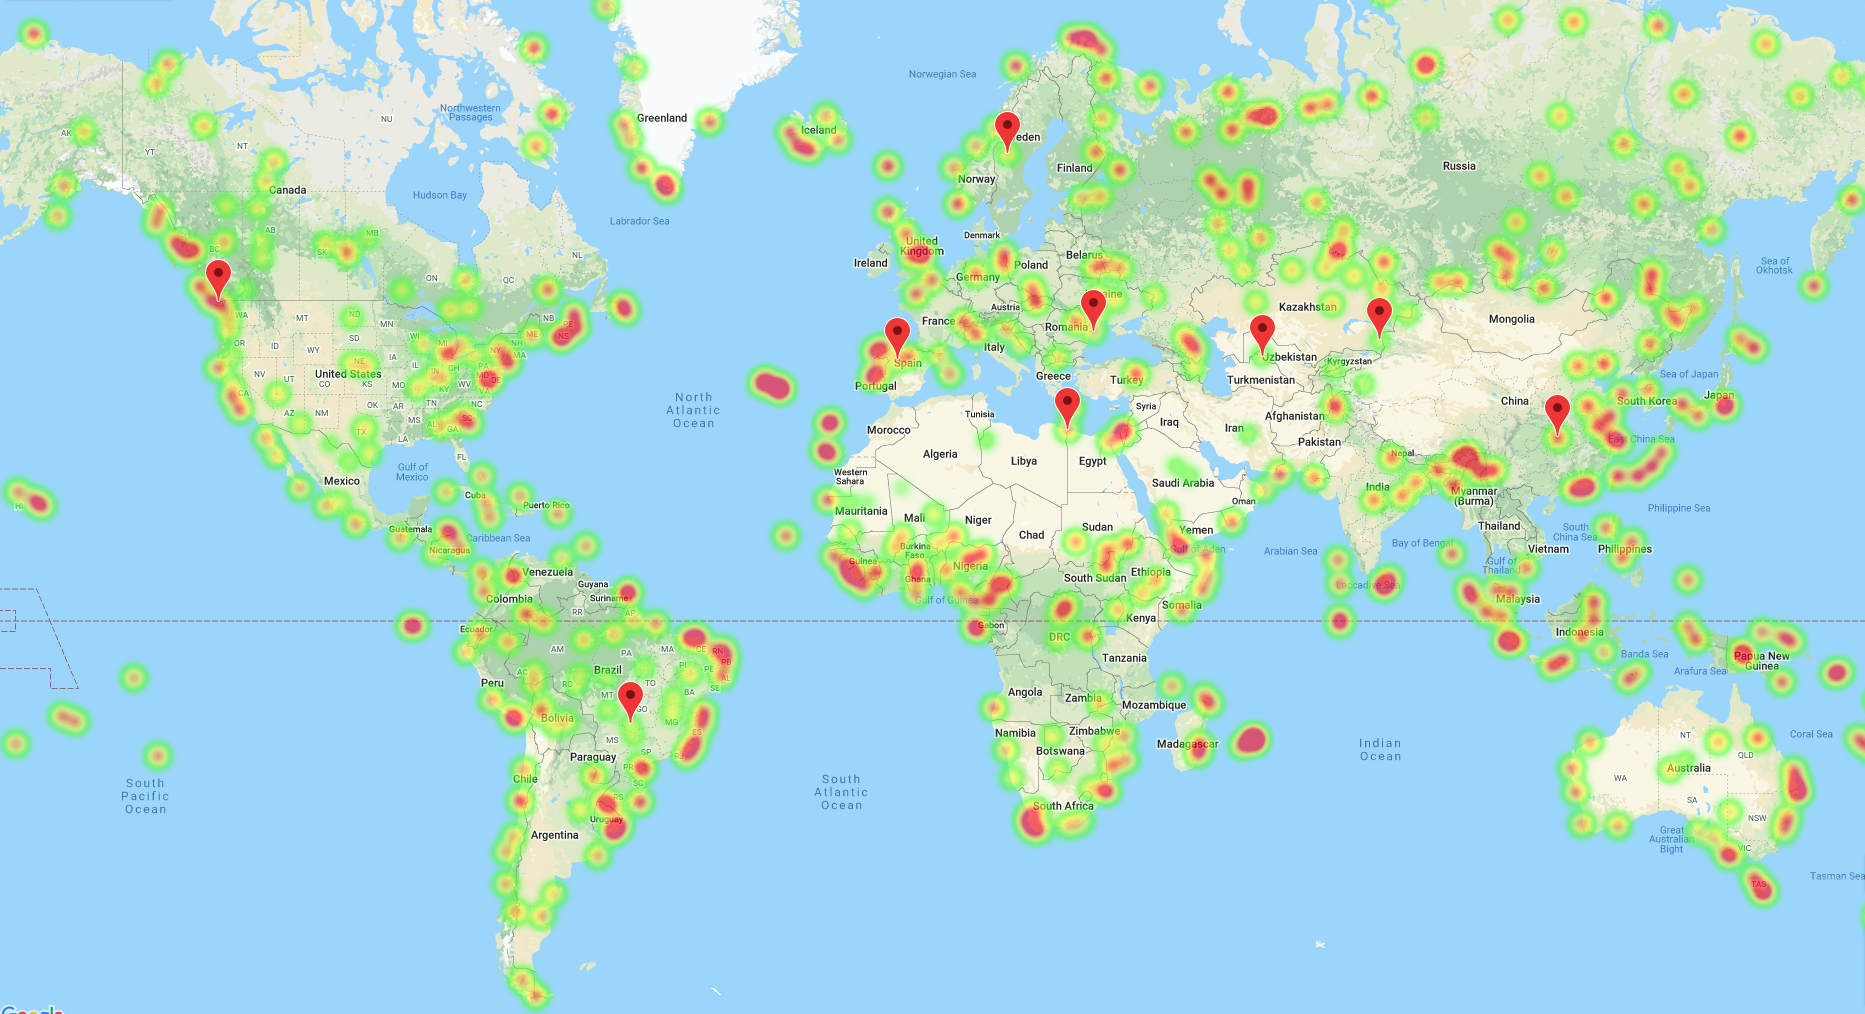